In [1]:
import numpy as np
import pandas as pd
from scipy import stats

filename = 'medical_clean.csv'
mrd = pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
mrd['ReAdmis'].unique()

array(['No', 'Yes'], dtype=object)

In [3]:
readmitted = mrd[mrd['ReAdmis'] == 'Yes']['VitD_levels']
not_readmitted = mrd[mrd['ReAdmis'] == 'No']['VitD_levels']

In [4]:
from scipy.stats import shapiro, levene, ttest_ind

s_readmitted = shapiro(readmitted)
s_notreadmitted = shapiro(not_readmitted)

levene_test = levene(readmitted, not_readmitted)

t_test_result = ttest_ind(readmitted, not_readmitted, equal_var = True)

/Applications/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6331.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
print(t_test_result)

TtestResult(statistic=0.40822135318600616, pvalue=0.683119914739662, df=9998.0)


In [6]:
alpha = 0.05
if t_test_result.pvalue < alpha:
    print("There is a significant difference in Vitamin D levels.")
else:
    print("There is no significant difference in Vitamin D levels.")

There is no significant difference in Vitamin D levels.


count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


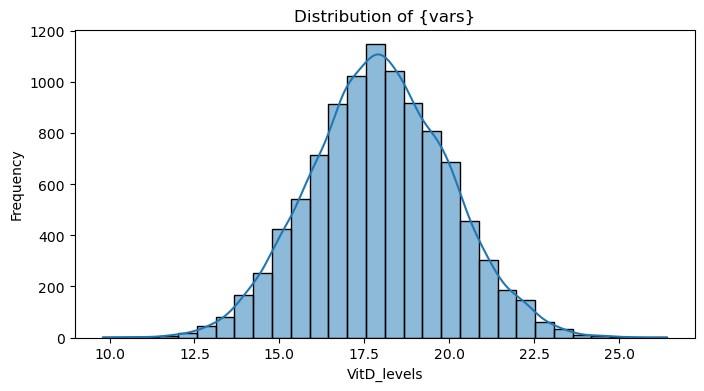

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64


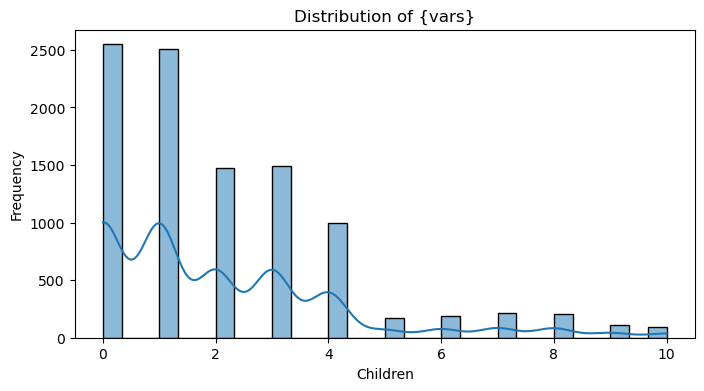

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

cont_vars = ['VitD_levels', 'Children']
cat_vars = ['ReAdmis', 'Marital']

for var in cont_vars:
    print(mrd[var].describe())

    plt.figure(figsize = (8,4))
    sb.histplot(mrd[var], bins = 30, kde = True)
    plt.title('Distribution of {vars}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64


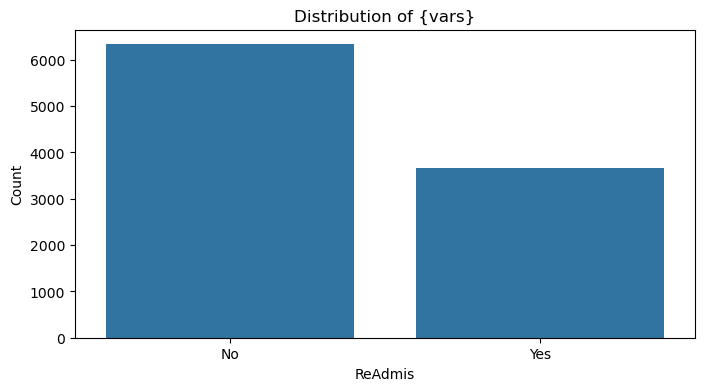

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64


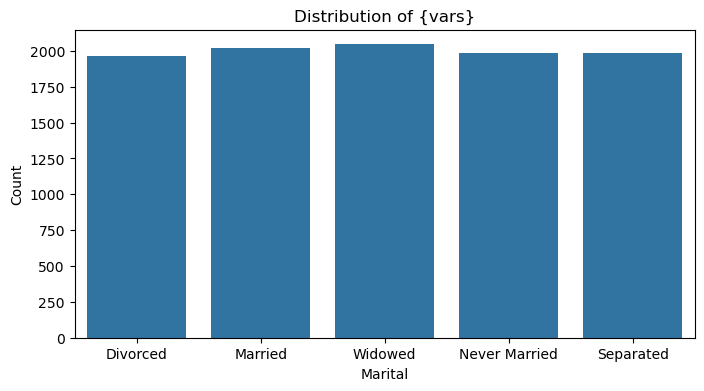

In [8]:
for var in cat_vars:
    print(mrd[var].value_counts())

    plt.figure(figsize = (8,4))
    sb.countplot(x = var, data = mrd)
    plt.title('Distribution of {vars}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

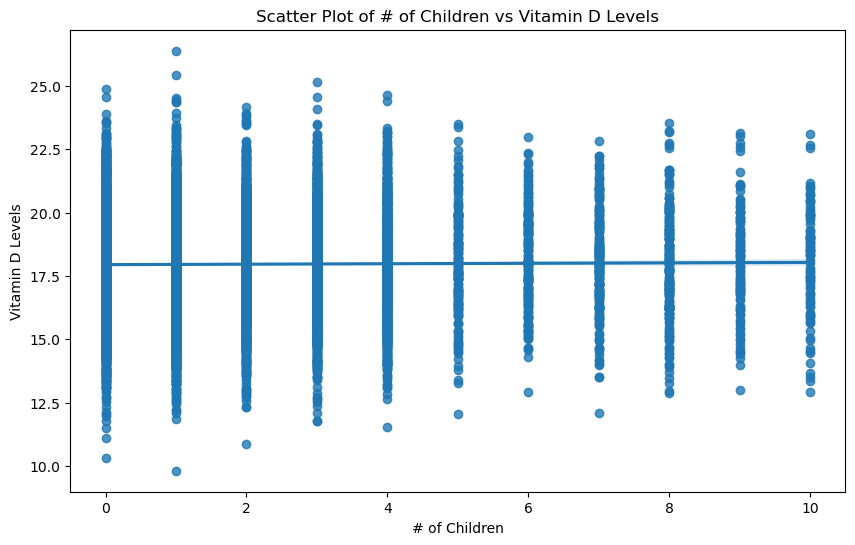

Correlation between # of children and Vitamin D levels: 0.009487013110847639


In [9]:
plt.figure(figsize = (10,6))
sb.regplot(x = 'Children', y = 'VitD_levels', data = mrd)
plt.title('Scatter Plot of # of Children vs Vitamin D Levels')
plt.xlabel('# of Children')
plt.ylabel('Vitamin D Levels')
plt.show()

correlation = mrd['Children'].corr(mrd['VitD_levels'])
print(f'Correlation between # of children and Vitamin D levels: {correlation}')

In [10]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(mrd['ReAdmis'], mrd['Marital'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('\nContingency Table:')
print(contingency_table)

print(f'\nChi-Square Test:\nChi2 statistic: {chi2}\np_value: {p}\nDegrees of Freedom: {dof}')
print('Expected Frequences')
print(expected)


Contingency Table:
Marital  Divorced  Married  Never Married  Separated  Widowed
ReAdmis                                                      
No           1283     1268           1243       1259     1278
Yes           678      755            741        728      767

Chi-Square Test:
Chi2 statistic: 5.0851943576943555
p_value: 0.278667196190538
Degrees of Freedom: 4
Expected Frequences
[[1241.5091 1280.7613 1256.0704 1257.9697 1294.6895]
 [ 719.4909  742.2387  727.9296  729.0303  750.3105]]


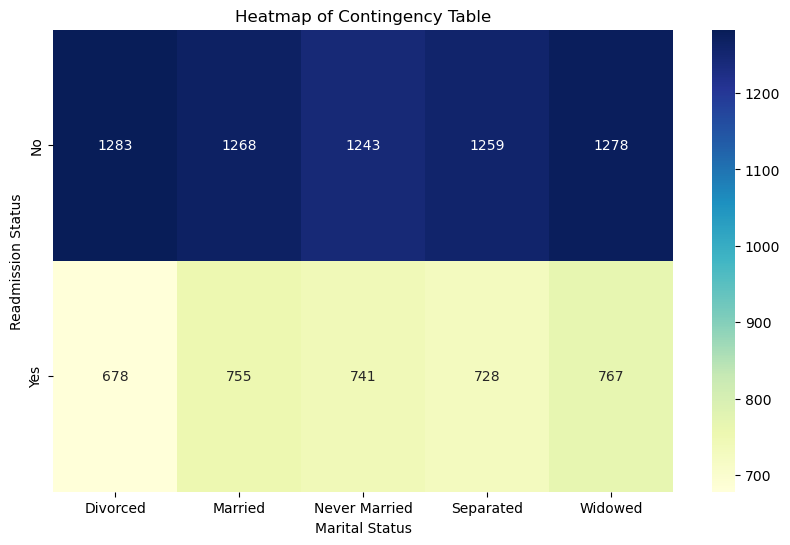

In [11]:
plt.figure(figsize = (10,6))
sb.heatmap(contingency_table, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.title('Heatmap of Contingency Table')
plt.xlabel('Marital Status')
plt.ylabel('Readmission Status')
plt.show()

In [12]:
alpha = 0.05
if p < alpha:
    print("There is a significant association between readmission status and marital status.")
else:
    print("There is no significant association.")

There is no significant association.
